1. Priprema i učitavanje podataka i biblioteka

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pysptools import eea
import scipy as sp
import matplotlib.pyplot as plt
import pysptools.abundance_maps as abundance_maps

In [2]:
mape = ['PD1C1', 'PD1C2', 'PD1C3']

In [3]:
print(f"{'Mapa':<10} | {'Datoteka':<12} | {'Veličina (B)':<15} | {'Dimenzije (L x S x B)':<20}")
print("-" * 65)

ucitani_podaci = {}

for mapa in mape:
    file_path = os.path.join(mapa, 'Image.bin')
    
    if os.path.exists(file_path):
        velicina_bajtova = os.path.getsize(file_path)
        
        total_elements = velicina_bajtova // 4
        
        lines = 1000
        samples = 1000
        bands = 100
    
        if total_elements == (lines * samples * bands):
            dimenzije = f"{lines} x {samples} x {bands}"
            
            data_map = np.memmap(file_path, dtype='float32', mode='r', shape=(bands, lines, samples))
            
            ucitani_podaci[mapa] = data_map
            
            print(f"{mapa:<10} | {'Image.bin':<12} | {velicina_bajtova:<15} | {dimenzije:<20}")
        else:
            print(f"{mapa:<10} | GREŠKA: Veličina datoteke ne odgovara opisu iz Readme-a!")
    else:
        print(f"{mapa:<10} | GREŠKA: Datoteka nije pronađena na putanji {file_path}")

print("\nBitni podaci o formatu:")
print(f"- Tip podataka: float32 (4 bajta po vrijednosti)")
print(f"- Redoslijed pohrane: Band-by-Band (BSQ format)")
print(f"- Ukupno elemenata po kocki: {1000*1000*100:,}")

Mapa       | Datoteka     | Veličina (B)    | Dimenzije (L x S x B)
-----------------------------------------------------------------
PD1C1      | Image.bin    | 400000000       | 1000 x 1000 x 100   
PD1C2      | Image.bin    | 400000000       | 1000 x 1000 x 100   
PD1C3      | Image.bin    | 400000000       | 1000 x 1000 x 100   

Bitni podaci o formatu:
- Tip podataka: float32 (4 bajta po vrijednosti)
- Redoslijed pohrane: Band-by-Band (BSQ format)
- Ukupno elemenata po kocki: 100,000,000


Prikazan RGB uzorak za PD1C1
Prikazan RGB uzorak za PD1C2
Prikazan RGB uzorak za PD1C3


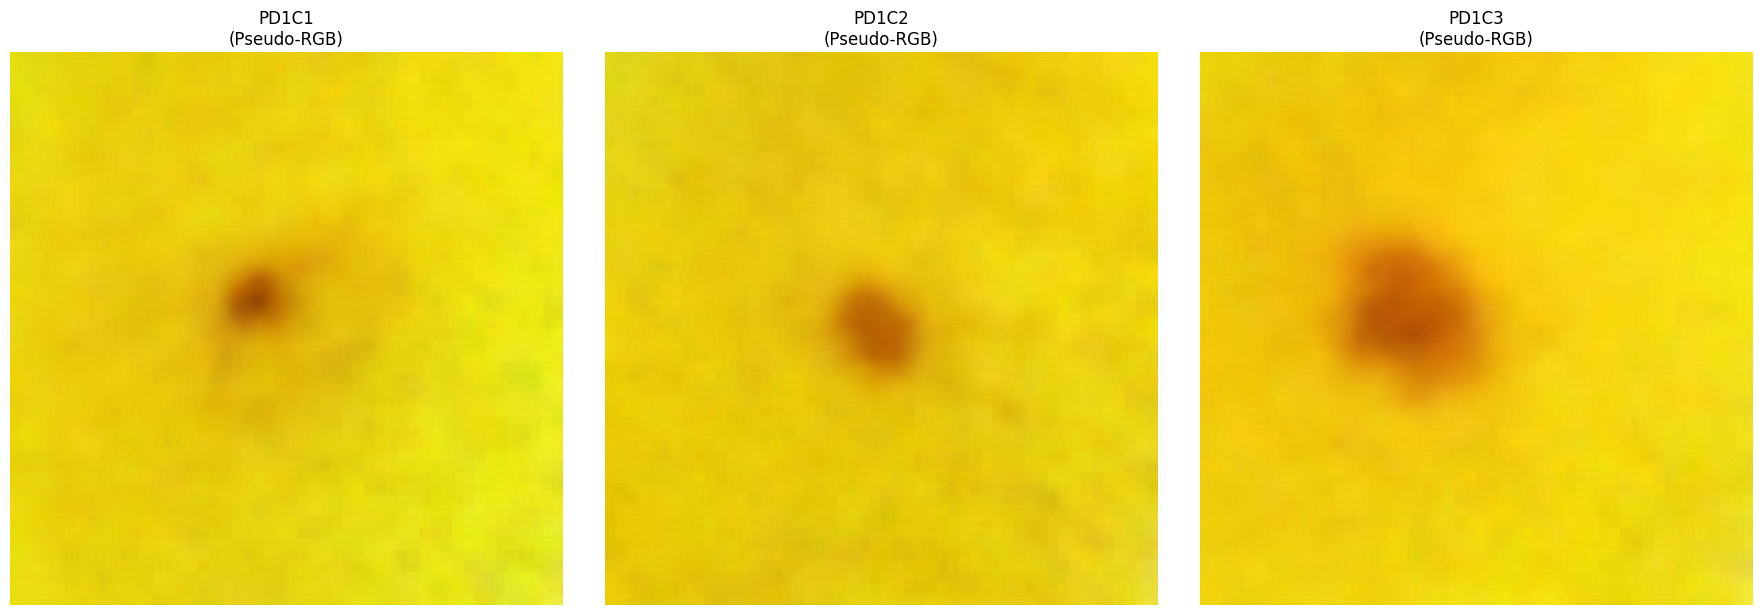

In [ ]:
mape = ['PD1C1', 'PD1C2', 'PD1C3']
lines, samples, bands = 1000, 1000, 100

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, mapa in enumerate(mape):
    file_path = os.path.join(mapa, 'Image.bin')
    
    if os.path.exists(file_path):
        data = np.fromfile(file_path, dtype=np.float32).reshape((bands, lines, samples))
        
        R = data[60, :, :] 
        G = data[35, :, :] 
        B = data[10, :, :] 
        
        rgb_img = np.zeros((lines, samples, 3))
        rgb_img[:,:,0] = R
        rgb_img[:,:,1] = G
        rgb_img[:,:,2] = B
       
        rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
        
        axes[i].imshow(rgb_img)
        axes[i].set_title(f'{mapa}\n(Pseudo-RGB)')
        axes[i].axis('off')
        
        print(f"Prikazan RGB uzorak za {mapa}")
    else:
        print(f"Greška: Nema datoteke u {mapa}")

plt.tight_layout()
plt.show()

2. Ekstrakcija endmembera

ATGP

Automatic Target Generation Process

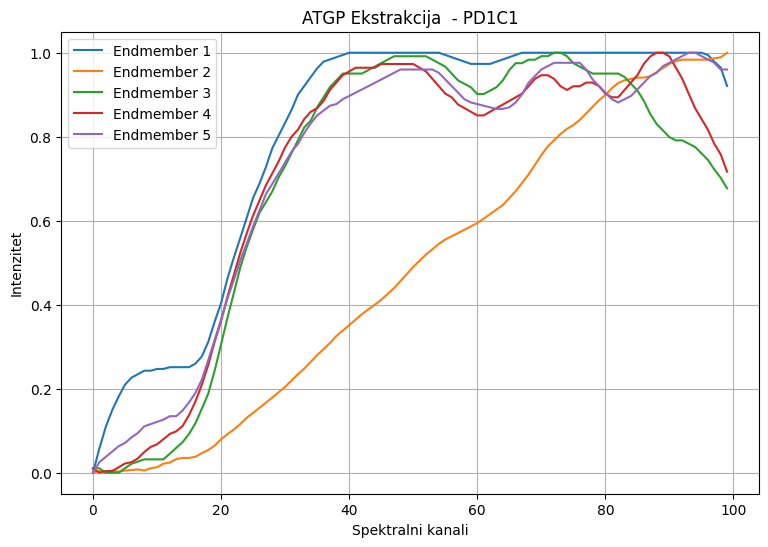

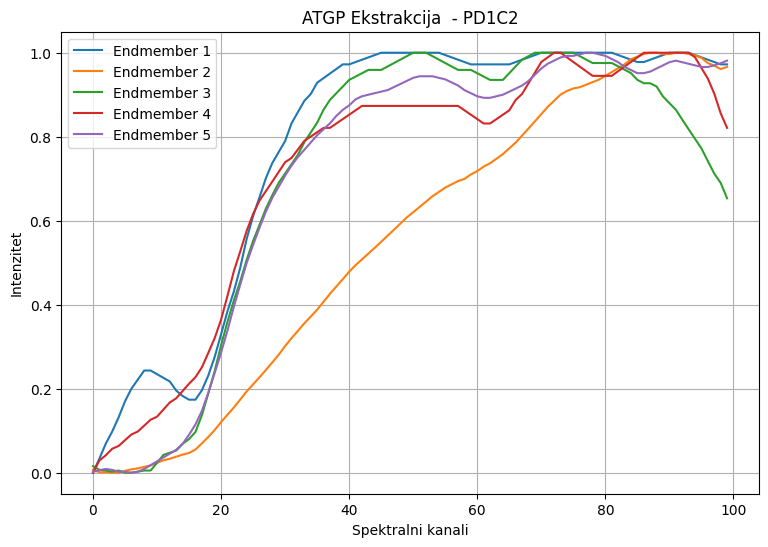

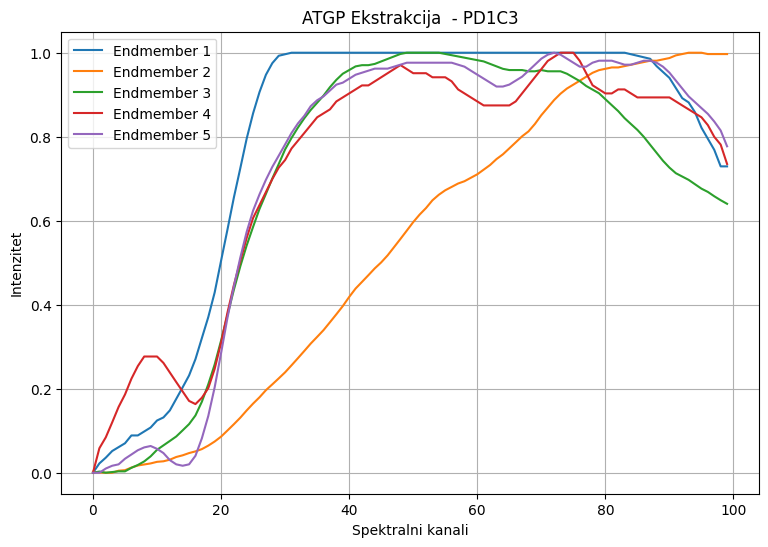

In [5]:
if not hasattr(np, 'int'):
    np.int = int

mape = ['PD1C1', 'PD1C2', 'PD1C3']
lines, samples, bands = 1000, 1000, 100
q_endmembers = 5

for mapa in mape:
    file_path = os.path.join(mapa, 'Image.bin')
    
    if os.path.exists(file_path):
        
        data = np.fromfile(file_path, dtype=np.float32).reshape((bands, lines, samples))
        data = data.transpose((1, 2, 0)) 
        
        try:
            atgp = eea.ATGP()
            
            em_atgp = atgp.extract(data, q=q_endmembers)
            
            plt.figure(figsize=(9, 6))
            for i in range(q_endmembers):
                plt.plot(em_atgp[i], label=f'Endmember {i+1}')

            plt.title(f'ATGP Ekstrakcija  - {mapa}')
            plt.xlabel('Spektralni kanali')
            plt.ylabel('Intenzitet')
            plt.legend()
            plt.grid(True)
            plt.show()
            
        except Exception as e:
            print(f"Greška pri obradi {mapa}: {e}")
    else:
        print(f"Datoteka {file_path} nije pronađena.")

FIPPI

Fast Iterative Pixel Purity Index

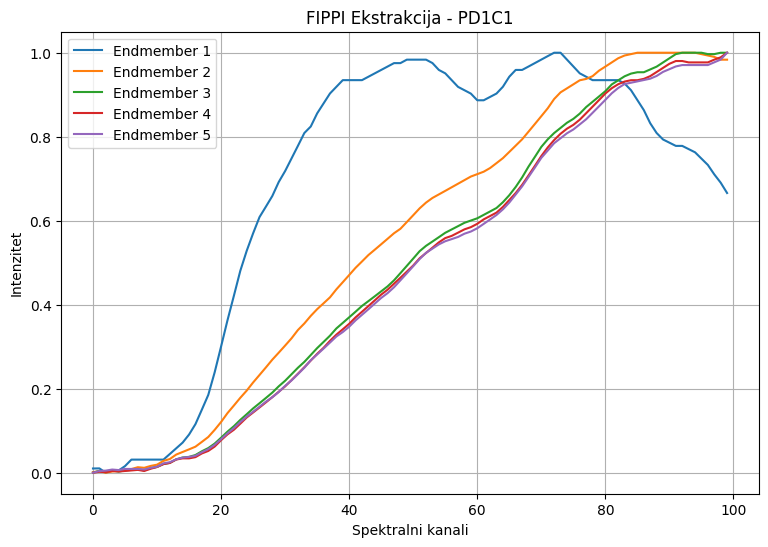

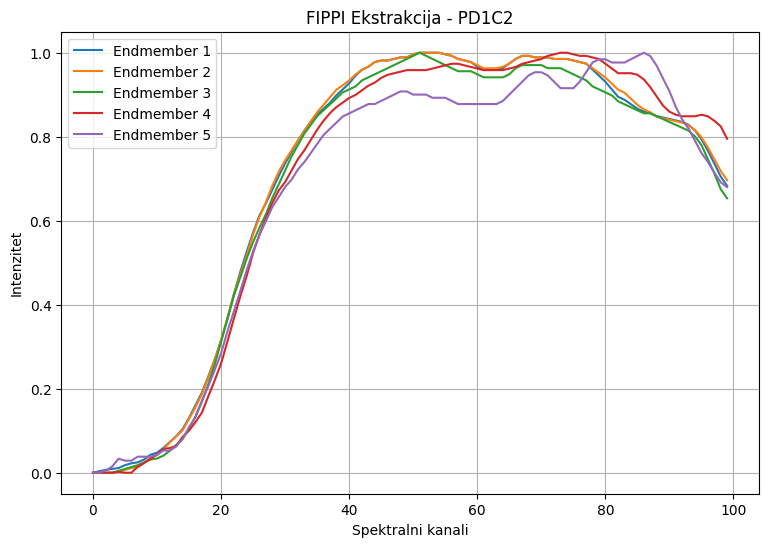

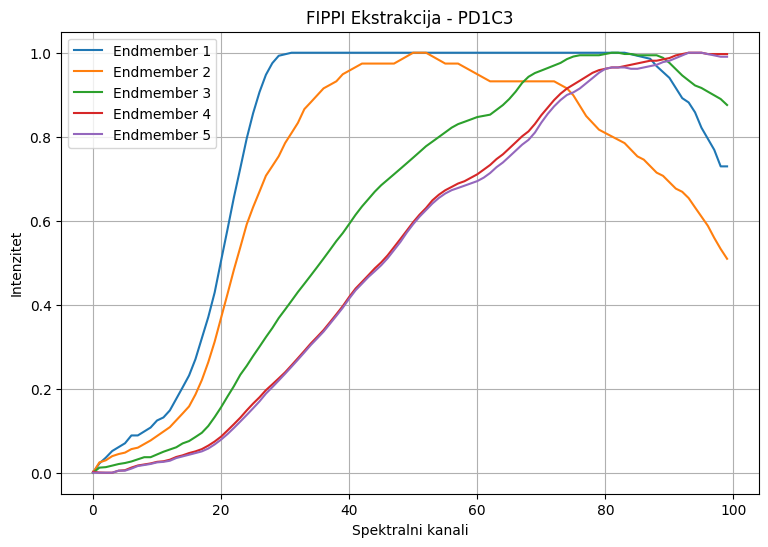

In [6]:
if not hasattr(np, 'int'):
    np.int = int

mape = ['PD1C1', 'PD1C2', 'PD1C3']
lines, samples, bands = 1000, 1000, 100
q_endmembers = 5

for mapa in mape:
    file_path = os.path.join(mapa, 'Image.bin')
    
    if os.path.exists(file_path):
        
        data = np.fromfile(file_path, dtype=np.float32).reshape((bands, lines, samples))
        data = data.transpose((1, 2, 0))
        
        try:

            fippi = eea.FIPPI()
            em_fippi = fippi.extract(data, q=q_endmembers)
            
            plt.figure(figsize=(9, 6))
            for i in range(q_endmembers):
                plt.plot(em_fippi[i], label=f'Endmember {i+1}')

            plt.title(f'FIPPI Ekstrakcija - {mapa}')
            plt.xlabel('Spektralni kanali')
            plt.ylabel('Intenzitet')
            plt.legend()
            plt.grid(True)
            plt.show()
            
            
        except Exception as e:
            print(f"Greška pri FIPPI obradi za {mapa}: {e}")
    else:
        print(f"Mapa {mapa} nije pronađena.")

N-FINDR 

N-dimensional Find Endmembers

In [7]:
class Fix:
    def sdet_c(self, x): return [np.linalg.det(x)]

sp.linalg._flinalg = Fix()

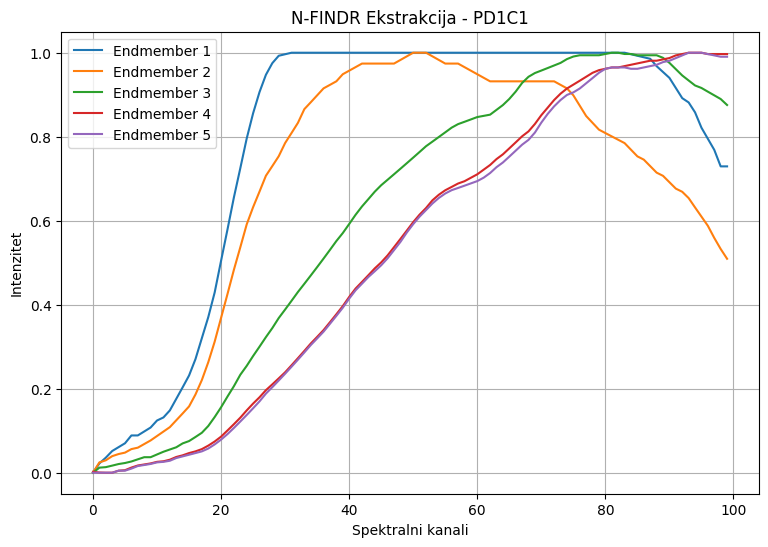

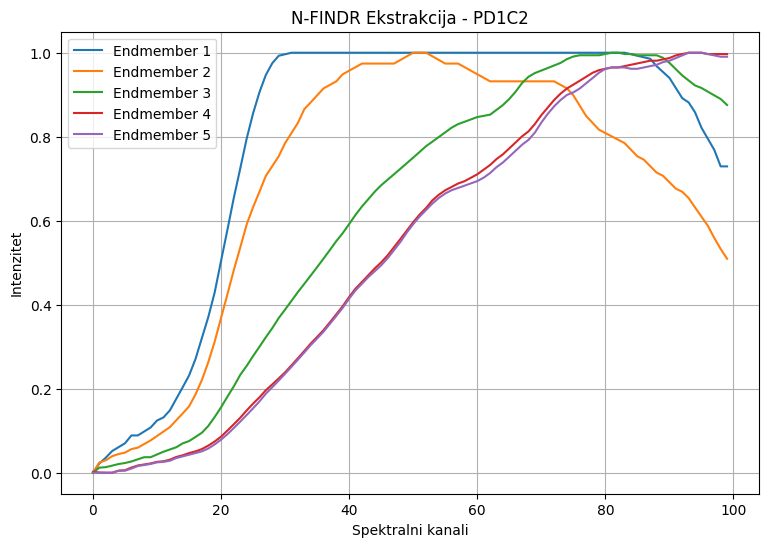

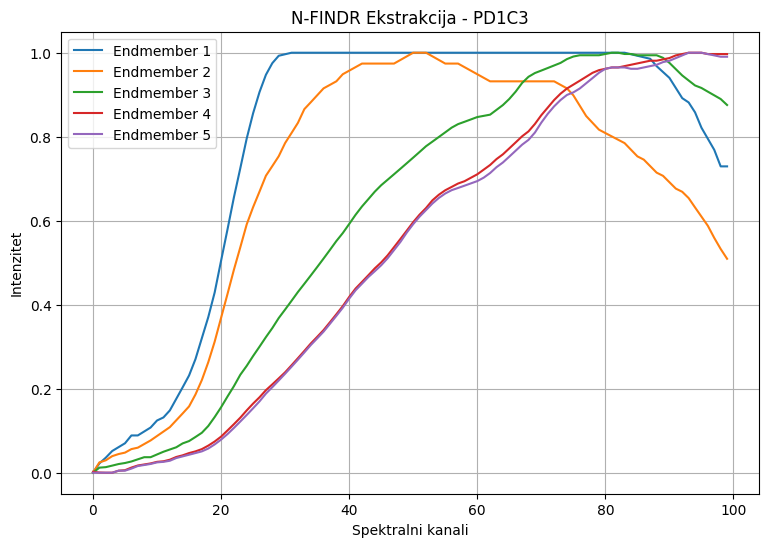

In [8]:
if not hasattr(np, 'int'):
    np.int = int

mape = ['PD1C1', 'PD1C2', 'PD1C3']
lines, samples, bands = 1000, 1000, 100
q_endmembers = 5

for mapa in mape:
    file_path = os.path.join(mapa, 'Image.bin')
    
    if os.path.exists(file_path):
        
        data = np.fromfile(file_path, dtype=np.float32).reshape((bands, lines, samples))
        data = data.transpose((1, 2, 0))
        
        try:
            
            nfindr = eea.NFINDR()
            em_nfindr = nfindr.extract(data, q=q_endmembers, transform=None)
            
            plt.figure(figsize=(9, 6))
            for i in range(q_endmembers):
                plt.plot(em_fippi[i], label=f'Endmember {i+1}') 

            plt.title(f'N-FINDR Ekstrakcija - {mapa}')
            plt.xlabel('Spektralni kanali')
            plt.ylabel('Intenzitet')
            plt.legend()
            plt.grid(True)
            plt.show()
            
            
        except Exception as e:
            print(f"Greška pri N-FINDR obradi za {mapa}: {e}")
    else:
        print(f"Mapa {mapa} nije pronađena.")

PPI

Pixel Purity Index

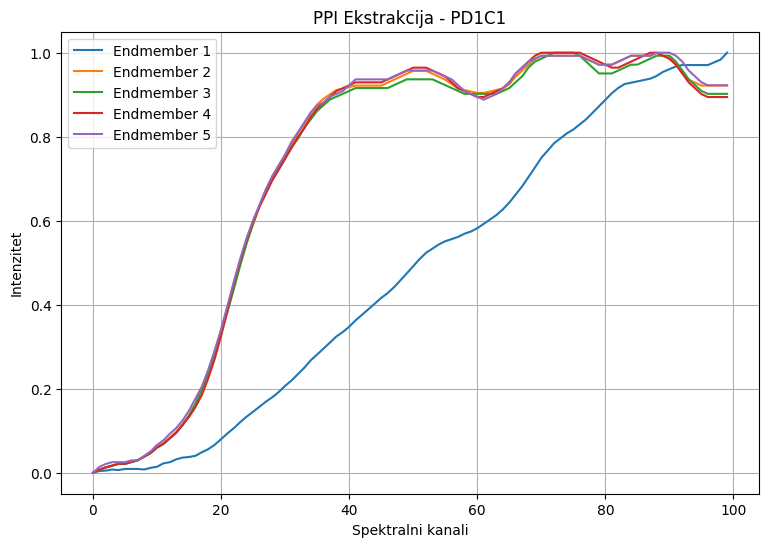

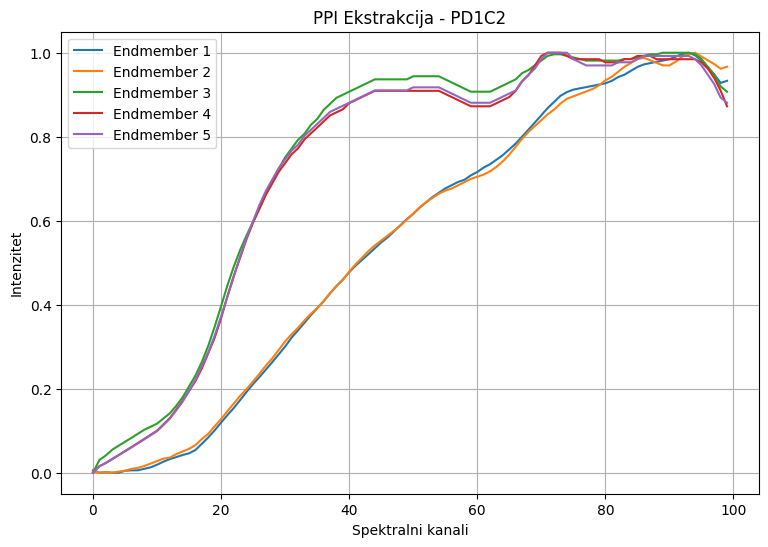

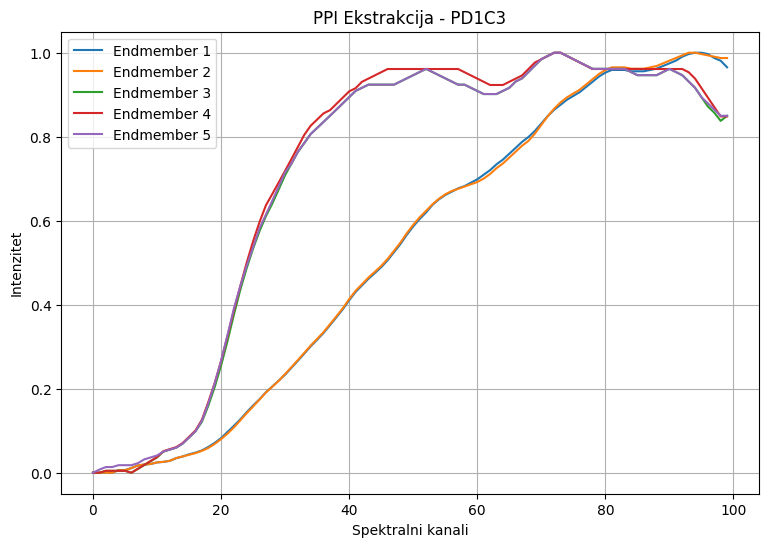

In [9]:
if not hasattr(np, 'int'):
    np.int = int

mape = ['PD1C1', 'PD1C2', 'PD1C3']
lines, samples, bands = 1000, 1000, 100
q_endmembers = 5

for mapa in mape:
    file_path = os.path.join(mapa, 'Image.bin')
    
    if os.path.exists(file_path):
        
        data = np.fromfile(file_path, dtype=np.float32).reshape((bands, lines, samples))
        data = data.transpose((1, 2, 0))
        
        try:
           
            ppi = eea.PPI()
            em_ppi = ppi.extract(data, q=q_endmembers)
           
            plt.figure(figsize=(9, 6))
            for i in range(q_endmembers):
                plt.plot(em_ppi[i], label=f'Endmember {i+1}')

            plt.title(f'PPI Ekstrakcija - {mapa}')
            plt.xlabel('Spektralni kanali')
            plt.ylabel('Intenzitet')
            plt.legend()
            plt.grid(True)
            plt.show()
            
            
        except Exception as e:
            print(f"Greška pri PPI obradi za {mapa}: {e}")
    else:
        print(f"Mapa {mapa} nije pronađena.")

3. Abudance Maps

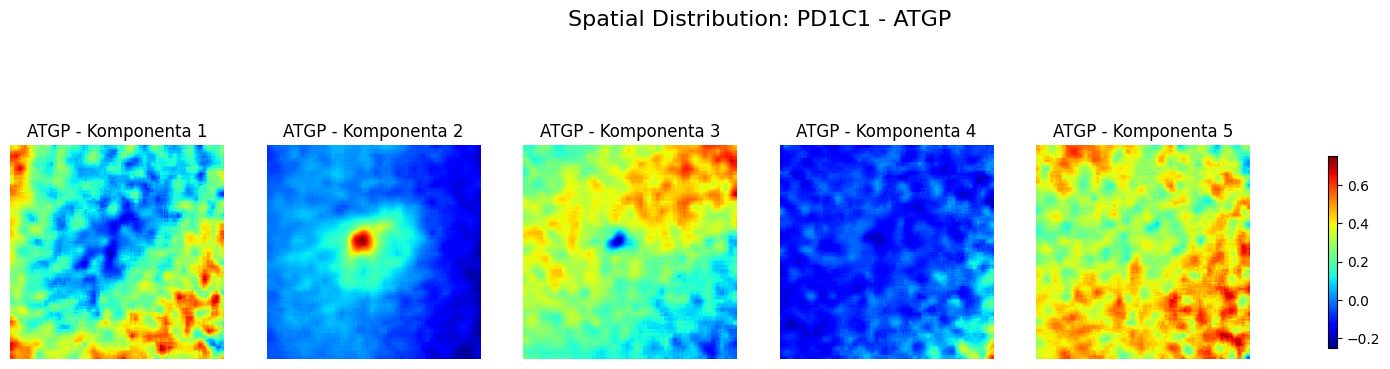

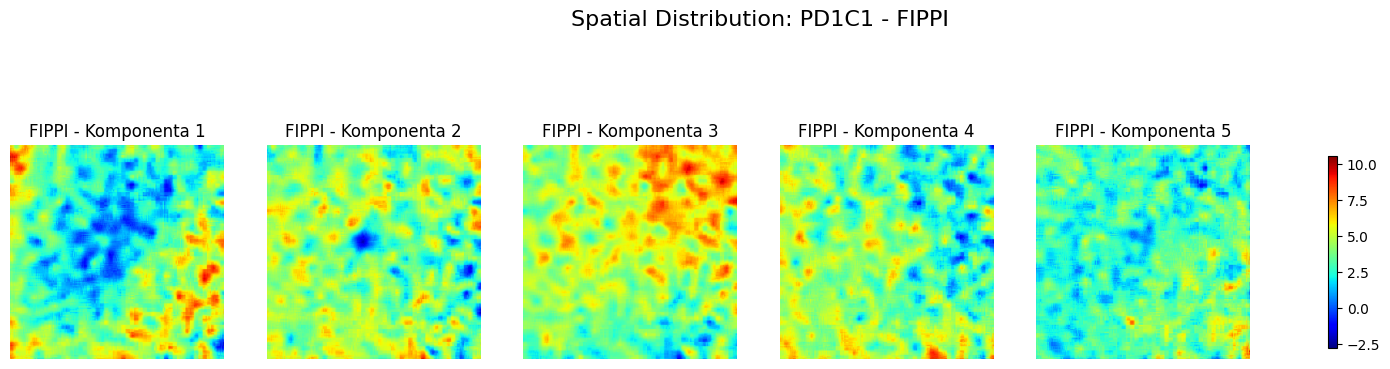

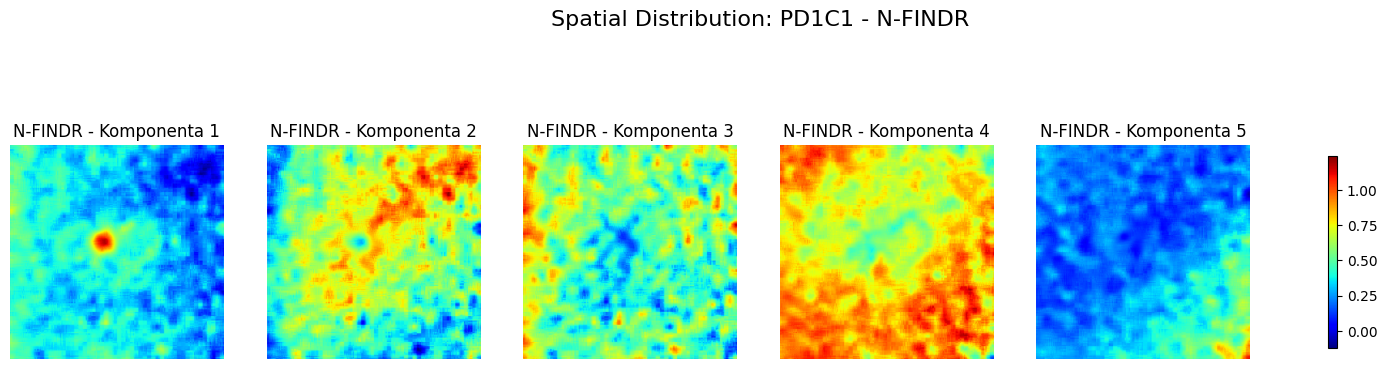

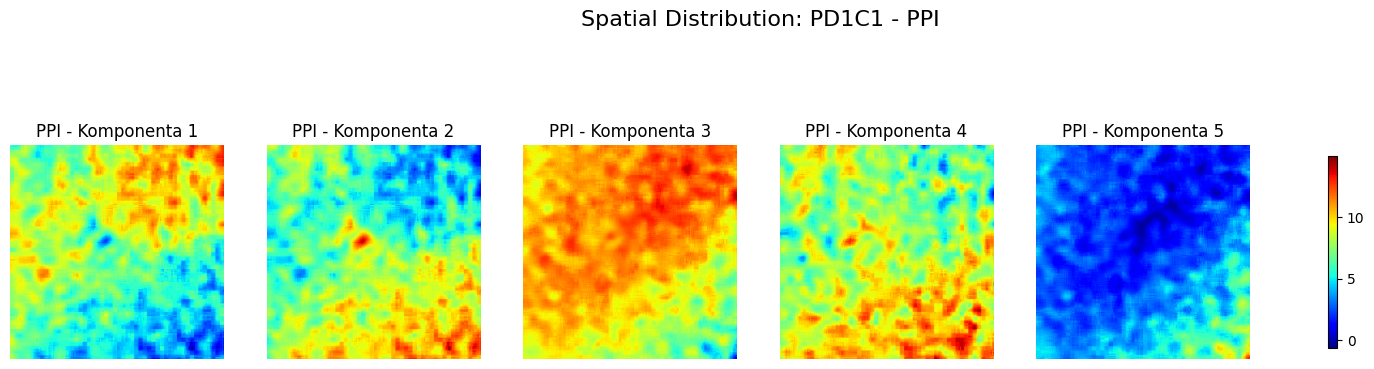

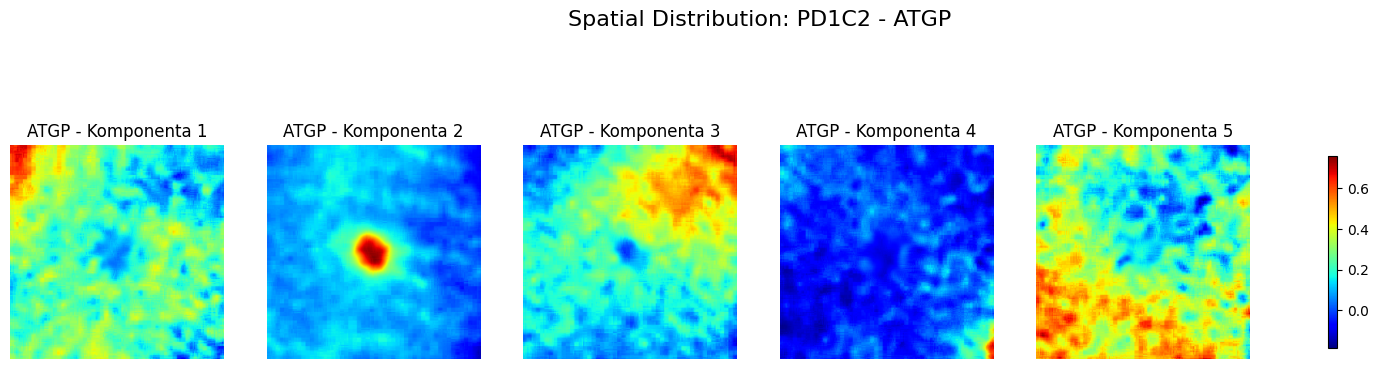

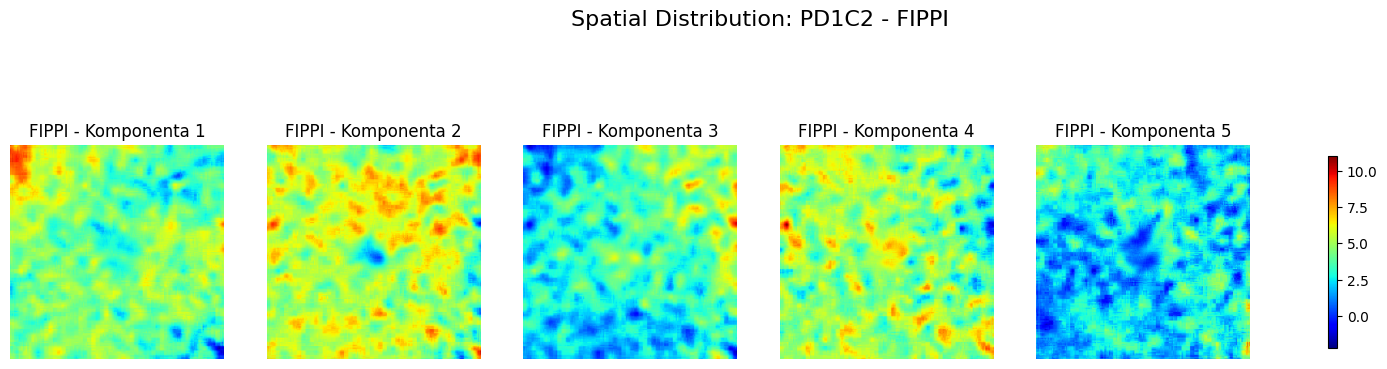

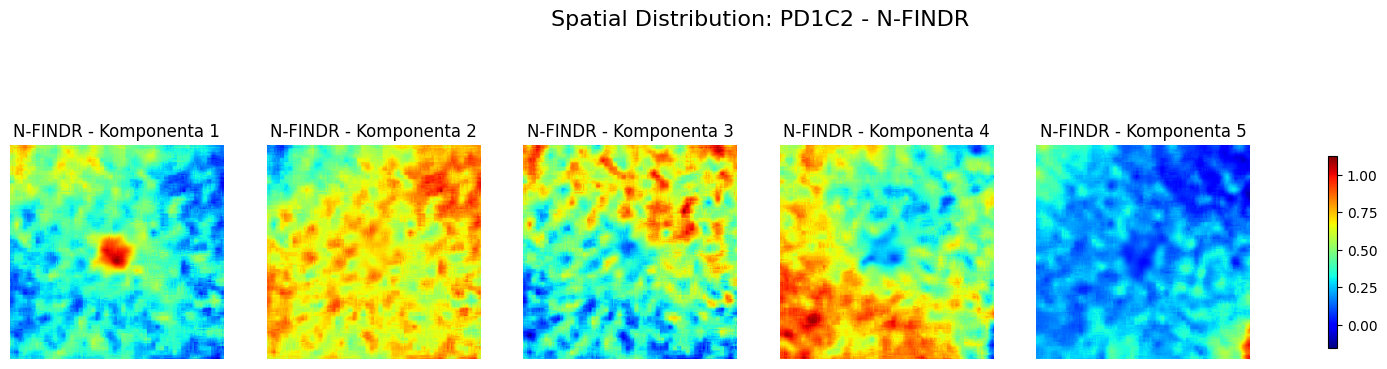

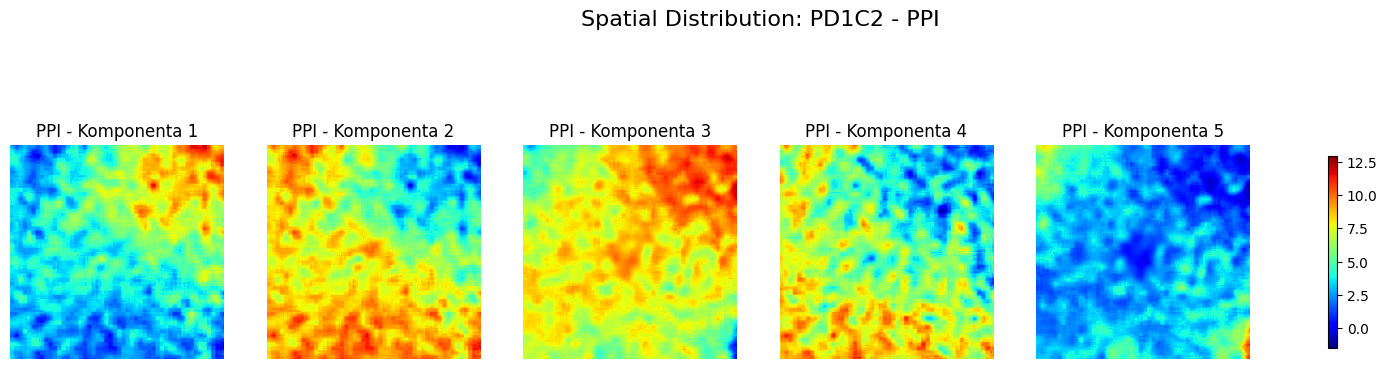

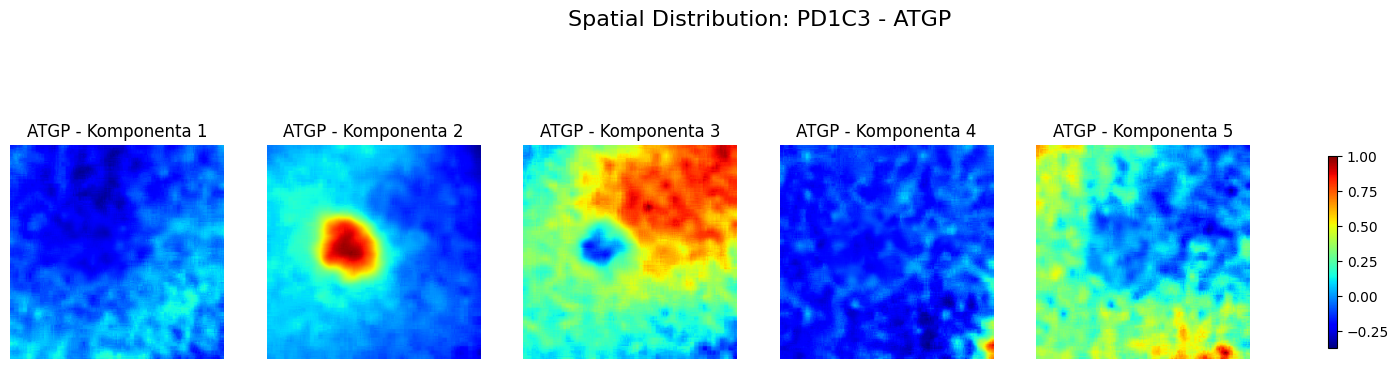

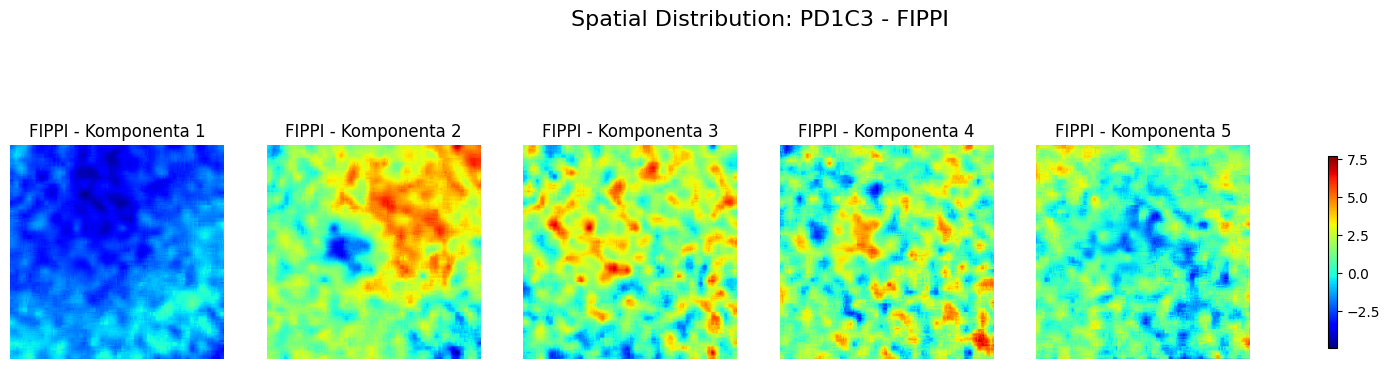

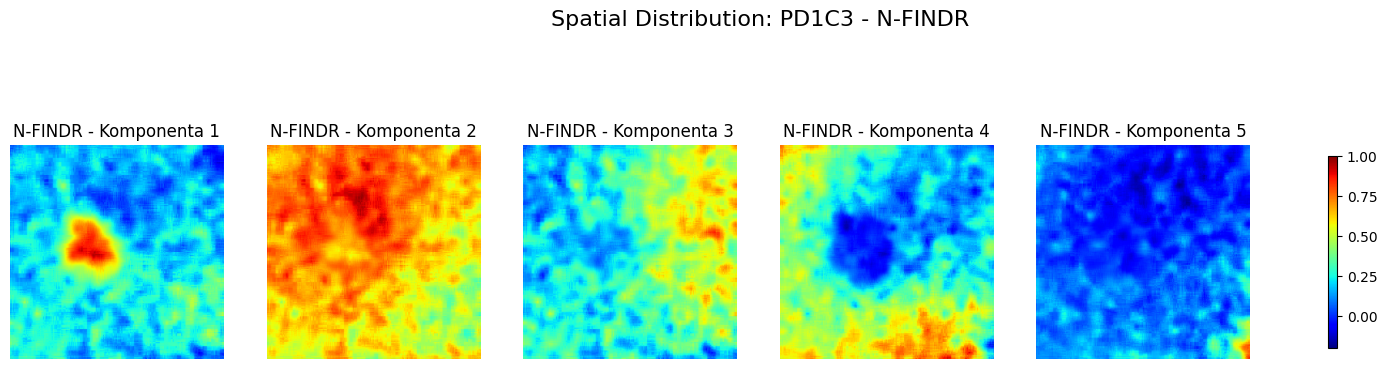

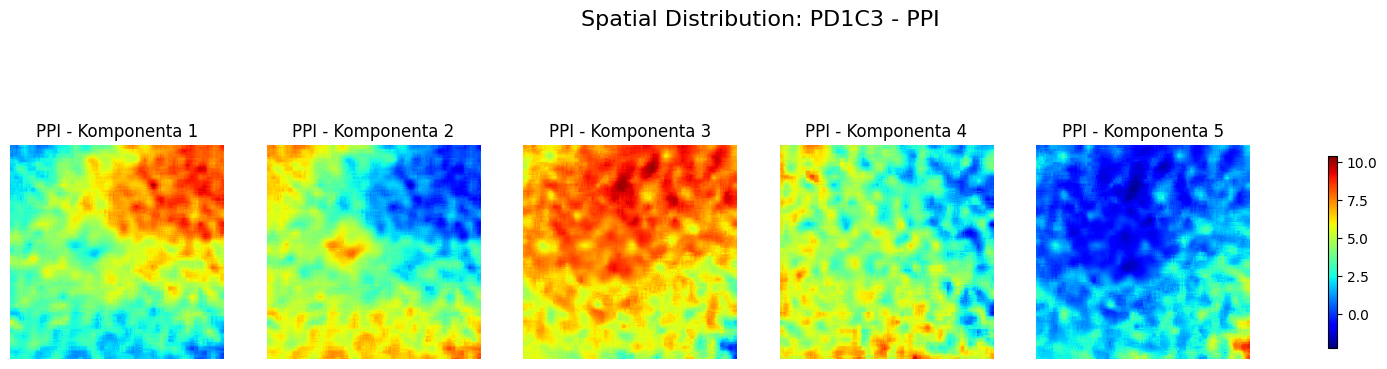

In [10]:
mape_imena = ['PD1C1', 'PD1C2', 'PD1C3']
h, w, bands = 1000, 1000, 100

metode = {
    'ATGP': em_atgp,
    'FIPPI': em_fippi,
    'N-FINDR': em_nfindr,
    'PPI': em_ppi
}

for mapa in mape_imena:
    file_path = os.path.join(mapa, 'Image.bin')
    
    if os.path.exists(file_path):
        
        data = np.fromfile(file_path, dtype=np.float32).reshape((bands, h, w))
        data = data.transpose((1, 2, 0)) 
        data_2d = np.reshape(data, (h * w, bands))
        
        for ime_metode, endmembers in metode.items():
            
            maps = abundance_maps.amaps.UCLS(data_2d, endmembers) 
            
            abundance_maps_reshaped = np.reshape(maps, (h, w, endmembers.shape[0]))
    
            fig, axes = plt.subplots(1, 5, figsize=(20, 5))
            for i in range(5):
                im = axes[i].imshow(abundance_maps_reshaped[:,:,i], cmap='jet')
                axes[i].set_title(f'{ime_metode} - Komponenta {i+1}')
                axes[i].axis('off')
            
            plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5)
            plt.suptitle(f'Spatial Distribution: {mapa} - {ime_metode}', fontsize=16)
            plt.show()

    else:
        print(f"Mapa {mapa} nije pronađena.")